In [28]:
#integrated dataset 

#import os
#import pandas as pd

#directory = "C:\\Users\\Admin\\OneDrive\\Documents\\beijing_air_quality"
#combined_data = pd.DataFrame()

#for filename in os.listdir(directory):
    #if filename.endswith(".csv"):
        #file_path = os.path.join(directory, filename)
        #df = pd.read_csv(file_path)
        #combined_data = pd.concat([combined_data, df], ignore_index=True)

#output_file_path = "C:\\Users\\Admin\\OneDrive\\Documents\\combined_data.csv"
#combined_data.to_csv(output_file_path, index=False)

# Print the combined dataset
#print("Combined Dataset:")
#print(combined_df)



In [29]:
import pandas as pd #lib for working with datasets. Has functions for analysing,cleaning and manipulating data

# Load the dataset
#dataset_path = ()   #df is a 2D data structure
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\Data science project\\combined_data.csv")

# Get the dataset information
print("Dataset Information:")
df.info()

# Get the dataset shape
print("\nDataset Shape:")
print(df.shape)

# Get the data description
print("\nData Description:")
data_description = df.describe()
print(data_description)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Dataset Shape:
(420768,

In [30]:
#data preprocessing 

import pandas as pd
from sklearn.preprocessing import StandardScaler  

#standardscaler-standardizes a feature by subtracting the mean and then scaling to unit variance 
#sklearn.preprocessing-a package with utility functions that transforms the raw data
 
# Load the dataset
df = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Documents\\Data science project\\combined_data.csv')

# Handling missing values
df = df.dropna()  # Drop rows with missing values
# Or you can impute missing values with mean, median, or other strategies:
# df = df.fillna(df.mean())

# Handling categorical variables
df = pd.get_dummies(df, columns=['wd'])  # Convert 'wd' column to one-hot encoded variables

# Separating numerical columns
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
numeric_data = df[numeric_cols] #numeric_data is a new data frame having only numeric_cols

# Scaling numerical features
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(numeric_data)
#fit_transform() method scales the numerical features by subtracting the mean and dividing by the SD, making them have zero mean and unit variance.

# Update the original dataframe with scaled features
df[numeric_cols] = scaled_data  #replaces the original numerical columns in the df

# Display the modified dataframe
print(df.head())

   No  year  month  day  hour     PM2.5      PM10       SO2       NO2   
0   1  2013      3    1     0 -0.941084 -1.100619 -0.546080 -1.242656  \
1   2  2013      3    1     1 -0.891180 -1.056846 -0.546080 -1.242656   
2   3  2013      3    1     2 -0.903656 -1.067789 -0.499145 -1.157094   
3   4  2013      3    1     3 -0.916132 -1.078732 -0.217535 -1.128573   
4   5  2013      3    1     4 -0.953560 -1.111563 -0.170600 -1.100052   

         CO  ...  wd_NNW  wd_NW   wd_S  wd_SE  wd_SSE  wd_SSW  wd_SW   wd_W   
0 -0.803647  ...    True  False  False  False   False   False  False  False  \
1 -0.803647  ...   False  False  False  False   False   False  False  False   
2 -0.803647  ...    True  False  False  False   False   False  False  False   
3 -0.803647  ...   False   True  False  False   False   False  False  False   
4 -0.803647  ...   False  False  False  False   False   False  False  False   

   wd_WNW  wd_WSW  
0   False   False  
1   False   False  
2   False   False  
3   Fa

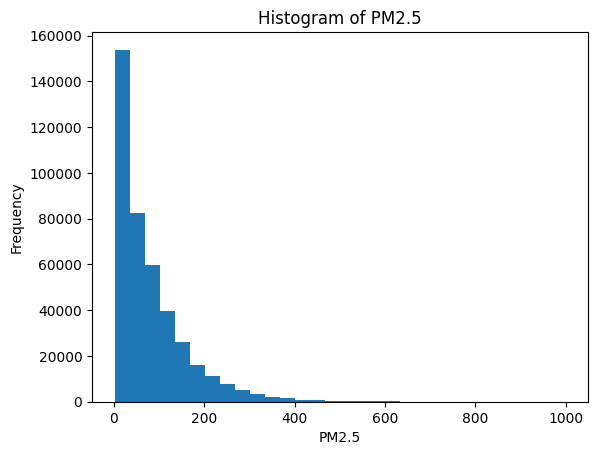

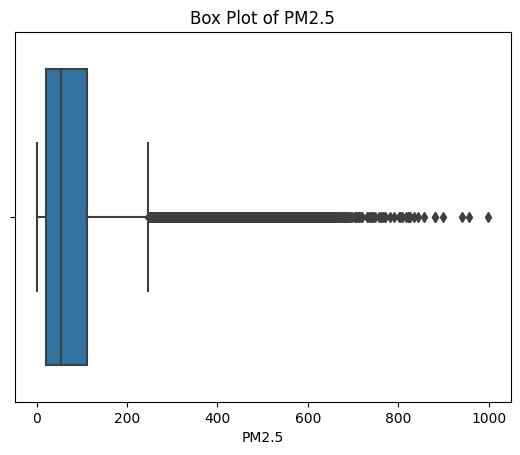

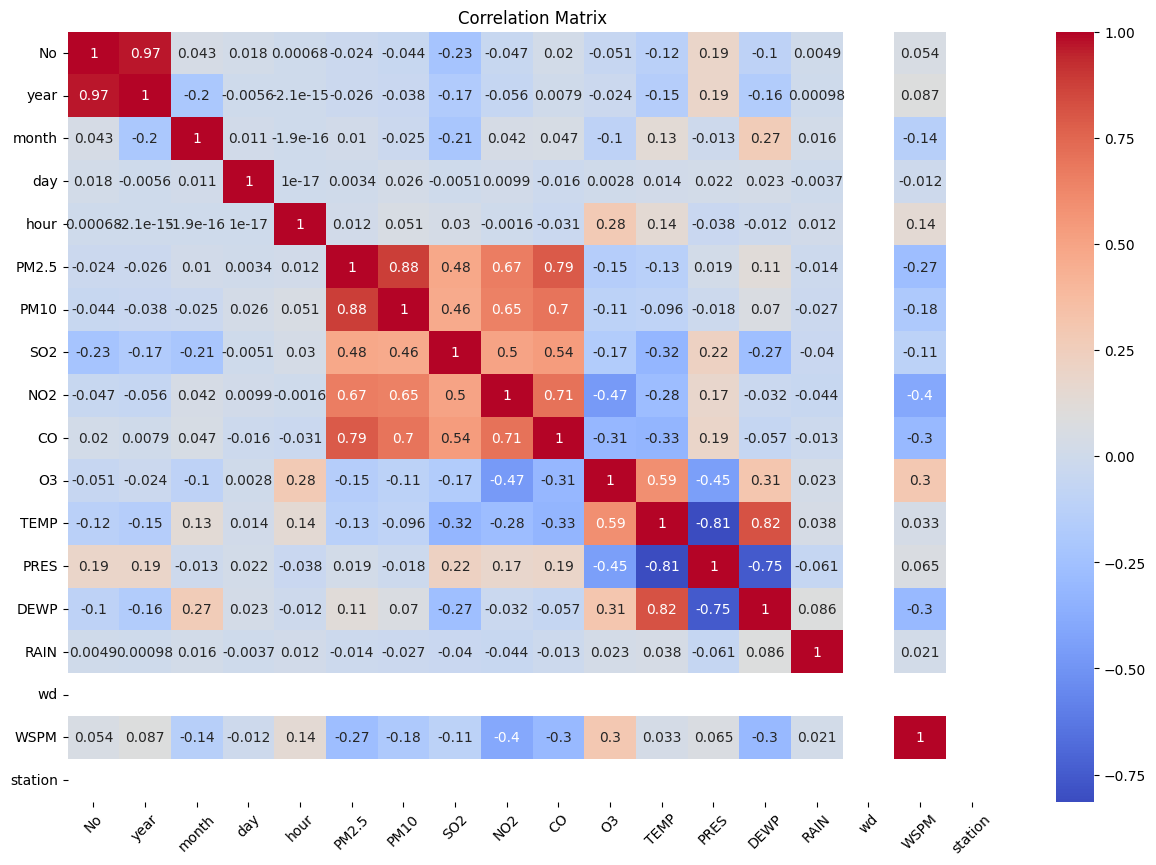

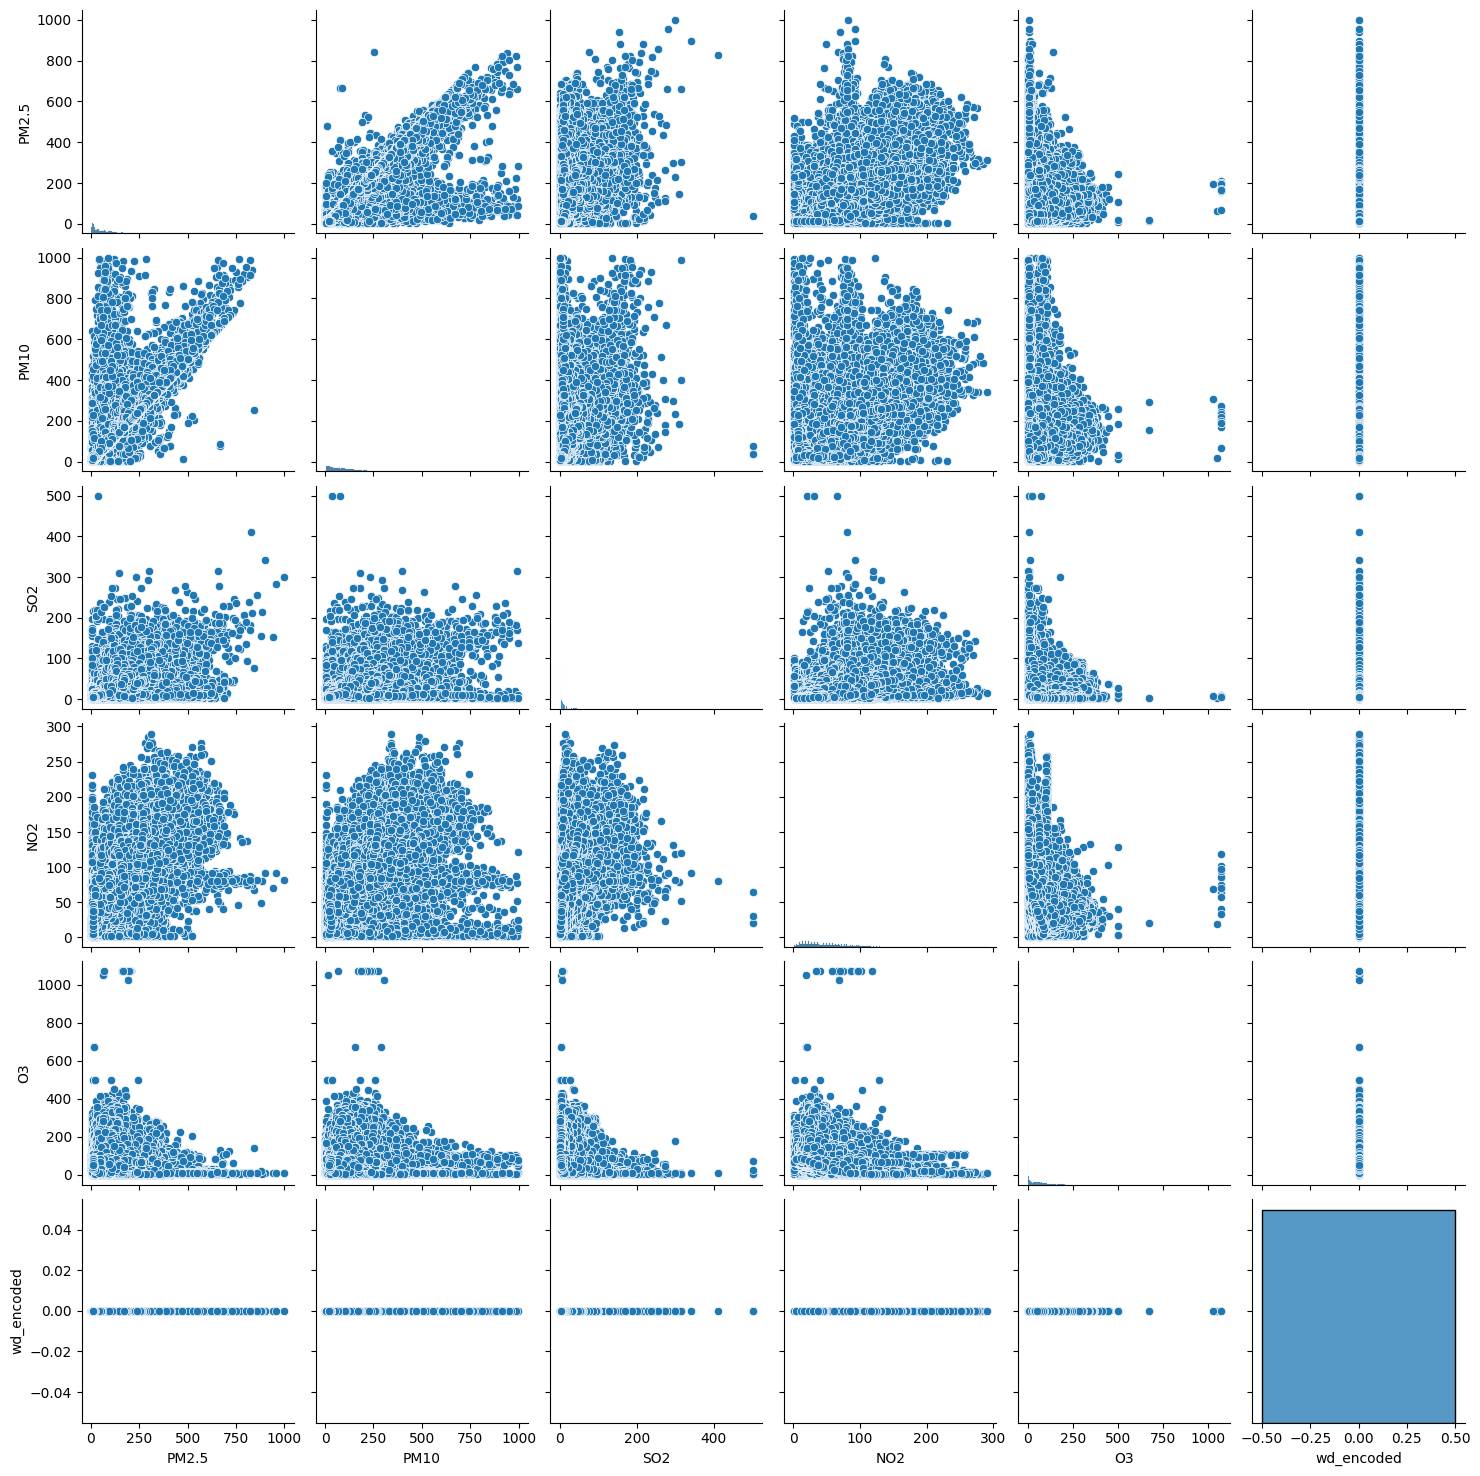

In [1]:
#data visualization 

import pandas as pd                             #data manipulation
import matplotlib.pyplot as plt                 #basic plotting
import seaborn as sns                           #adv visualization
from sklearn.preprocessing import LabelEncoder  # LabelEncoder from scikit-learn for label encoding categorical variables.

# Load the dataset
df = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Documents\\Data science project\\combined_data.csv')

# Identify columns with non-numeric values (having non numeric data type)
non_numeric_cols = df.select_dtypes(exclude='number').columns

# Handle non-numeric values in the identified columns
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot histogram of 'PM2.5'
#histogram-distribution frequency
plt.hist(df['PM2.5'], bins=30)  #bins-no. of bars
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5')
plt.show()

# Box plot of 'PM2.5' 
# box plot-demonstating the locality,spread and skewness groups of numerical data
sns.boxplot(x=df['PM2.5'])
plt.xlabel('PM2.5')
plt.title('Box Plot of PM2.5')
plt.show()

# Compute correlation matrix
# calculates the pairwise correlation between all numerical columns
# measure of strenght and direction btw two variables. range= -1 to 1
# -1 indicates a perfect -ve correlation
# 1 indicates a perfect +ve correlation
# 0 indicates no correlation
corr_matrix = df.corr()

# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Visualize correlation matrix as a heatmap
# annot=True parameter adds numerical values to the heatmap cells. 
# The colormap is set to 'coolwarm' for better visualization. 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

# Perform label encoding on 'wd' column
label_encoder = LabelEncoder()
df['wd_encoded'] = label_encoder.fit_transform(df['wd'])

# Drop the original 'wd' column if not needed
df.drop('wd', axis=1, inplace=True)

# Create scatter plot matrix
sns.pairplot(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'wd_encoded']])
plt.show()


In [2]:
# feature extraction and selection 
import pandas as pd
from sklearn.decomposition import PCA  #pca for feature extraction
from sklearn.feature_selection import SelectKBest, f_regression #SelectKBest and f_regression for feature selection



# Load the dataset
df = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Documents\\Data science project\\combined_data.csv')

# Drop rows with missing values
df = df.dropna()

# Convert non-numeric columns to numeric
non_numeric_cols = df.select_dtypes(exclude='number').columns
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Perform feature extraction using PCA
pca = PCA(n_components=5)  # Selecting 5 principal components
#applies PCA to the DataFrame after dropping the non-numeric columns using df.drop(columns=non_numeric_cols). 
# The transformed data is stored in pca_data.
pca_data = pca.fit_transform(df.drop(columns=non_numeric_cols))

# Create a new dataframe with the PCA components
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Perform feature selection using correlation analysis
correlation_matrix = df.corr()
target_variable = 'PM2.5'  # Replace with your target variable name
correlation_scores = correlation_matrix[target_variable].abs().sort_values(ascending=False)
# scores are sorted in descending order

# Select the top K features based on correlation scores
k = 3  # Replace with the desired number of features
selected_features = correlation_scores[1:k+1].index.tolist()  # Exclude the target variable

# Create a new dataframe with the selected features
selected_features_df = df[selected_features]

# Print the selected features and their correlation scores
print("Selected Features:")
print(selected_features_df.head())
print("\nCorrelation Scores:")
print(correlation_scores[1:k+1])

# Continue with the remaining steps of your project...


Selected Features:
   PM10     CO   NO2
0   4.0  300.0   7.0
1   8.0  300.0   7.0
2   7.0  300.0  10.0
3   6.0  300.0  11.0
4   3.0  300.0  12.0

Correlation Scores:
PM10    0.884324
CO      0.792041
NO2     0.670753
Name: PM2.5, dtype: float64


Linear Regression:
Mean Absolute Error: 6.007875148007792e-13
Mean Squared Error: 7.972554684021019e-25
R-squared Score: 1.0
Decision Tree Regression:
Mean Absolute Error: 0.02333804809052334
Mean Squared Error: 0.4755885588558856
R-squared Score: 0.999928472117826
Random Forest Regression:
Mean Absolute Error: 0.019073707370736954
Mean Squared Error: 0.25569537828068617
R-squared Score: 0.9999615437576251


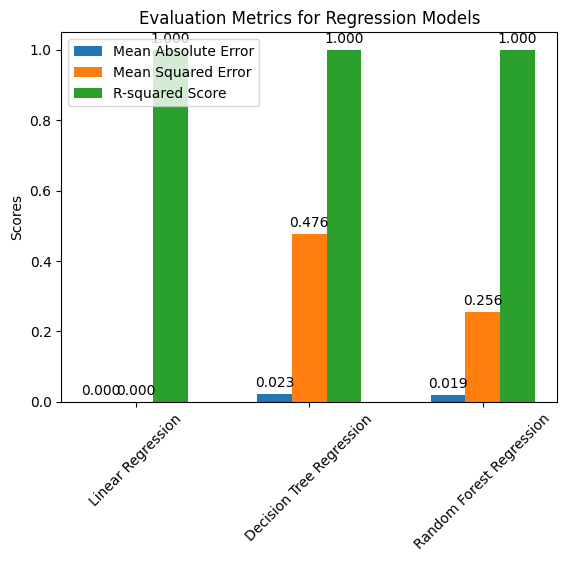

In [33]:
import matplotlib.pyplot as plt
import numpy as np  #numerical operations
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# input features (X) and target variable (y)
X = df[['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
y = df['PM2.5']

# Create an instance and train the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Create and train the decision tree regressor
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

# Create and train the random forest regressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test set for all models
linear_pred = linear_regressor.predict(X_test)
decision_tree_pred = decision_tree_regressor.predict(X_test)
random_forest_pred = random_forest_regressor.predict(X_test)

# Calculate evaluation metrics for all models
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

decision_tree_mae = mean_absolute_error(y_test, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)

# Print the evaluation metrics for all models
print("Linear Regression:")
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("R-squared Score:", linear_r2)

print("Decision Tree Regression:")
print("Mean Absolute Error:", decision_tree_mae)
print("Mean Squared Error:", decision_tree_mse)
print("R-squared Score:", decision_tree_r2)

print("Random Forest Regression:")
print("Mean Absolute Error:", random_forest_mae)
print("Mean Squared Error:", random_forest_mse)
print("R-squared Score:", random_forest_r2)

# This code creates a dictionary models where the keys are the model names and 
# the values are lists containing the corresponding evaluation scores.
models = {
    'Linear Regression': [linear_mae, linear_mse, linear_r2],
    'Decision Tree Regression': [decision_tree_mae, decision_tree_mse, decision_tree_r2],
    'Random Forest Regression': [random_forest_mae, random_forest_mse, random_forest_r2]
}

# Extract the evaluation scores
mae_scores = [score[0] for score in models.values()]
mse_scores = [score[1] for score in models.values()]
r2_scores = [score[2] for score in models.values()]

# Plotting the performance of regressors
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mae_scores, width, label='Mean Absolute Error')
rects2 = ax.bar(x, mse_scores, width, label='Mean Squared Error')
rects3 = ax.bar(x + width, r2_scores, width, label='R-squared Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(models.keys(), rotation=45)
ax.legend()

# Add the scores as text above each bar
for rect in rects1 + rects2 + rects3:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Save the figure
plt.savefig('regression_scores.png', bbox_inches='tight')

# Show the bar graph
plt.show()
